# Skilled BootCamp ICA - Machine Learning Prediction Stroke Using Classification Model Algorithms

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error, roc_curve, auc, plot_roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)  
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing the Dataset Stroke Dataset
file = "C:/Users/orind/OneDrive/Documents/Data Analytics/Dataset/Stroke_Dataset.csv"


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
stdf = pd.read_csv(file)

In [5]:
stdf.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
stdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stdf.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
stdf.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# the ID column has not significant impact on the dataset. it will be droped since it is just a 
# unique identofier for each patient
stdf.drop(['id'], axis=1, inplace=True)

In [10]:
#I descovered that there is a single row with gender as other. this was isolated at this stage.
stdf = stdf[stdf['gender']!= 'Other']

In [11]:
stdf.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
stdf.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [13]:
stdf['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [14]:
#Replacing the NA Values with the mean of the bmi values
stdf['bmi'] = stdf['bmi'].fillna(round (stdf['bmi'].mean(), 2))


In [15]:
stdf.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
dict = {}
for i in list(stdf.columns):
    dict[i] = stdf[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


,unique count
gender,2
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3978
bmi,419
smoking_status,4


In [17]:
#Checking on statiscal summary of the data set
stdf.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894381,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


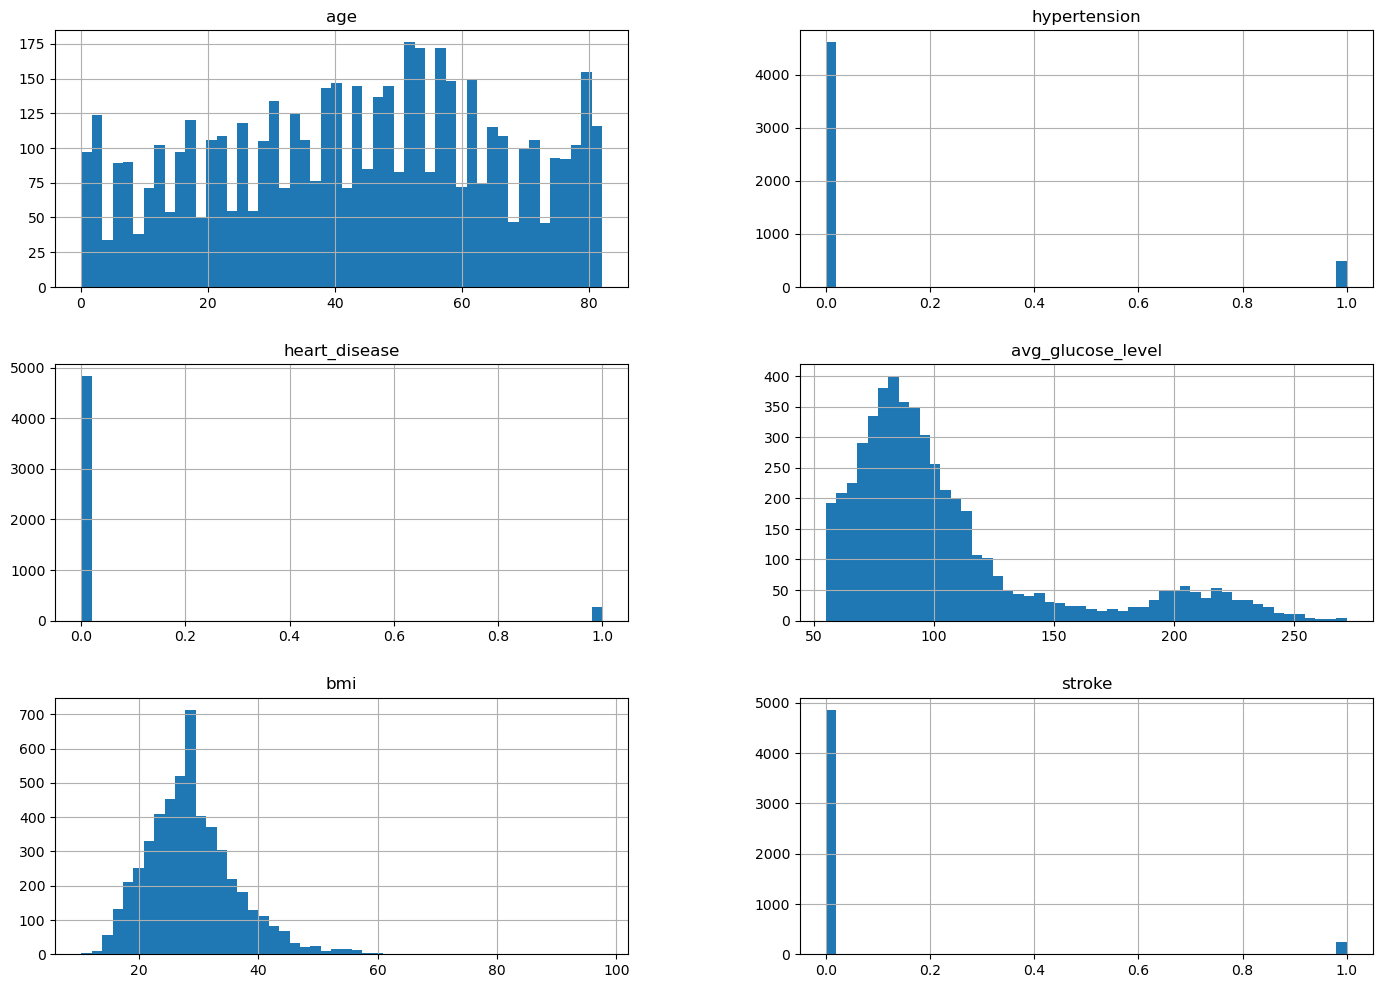

In [18]:
#visualizing the numerical attributes
stdf.hist(bins = 50, figsize = (17,12))
plt.show()

In [19]:
#Visualing the attributes with categorical values to draw further insight
cat_stdf = stdf[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
               'Residence_type', 'smoking_status', 'stroke']]

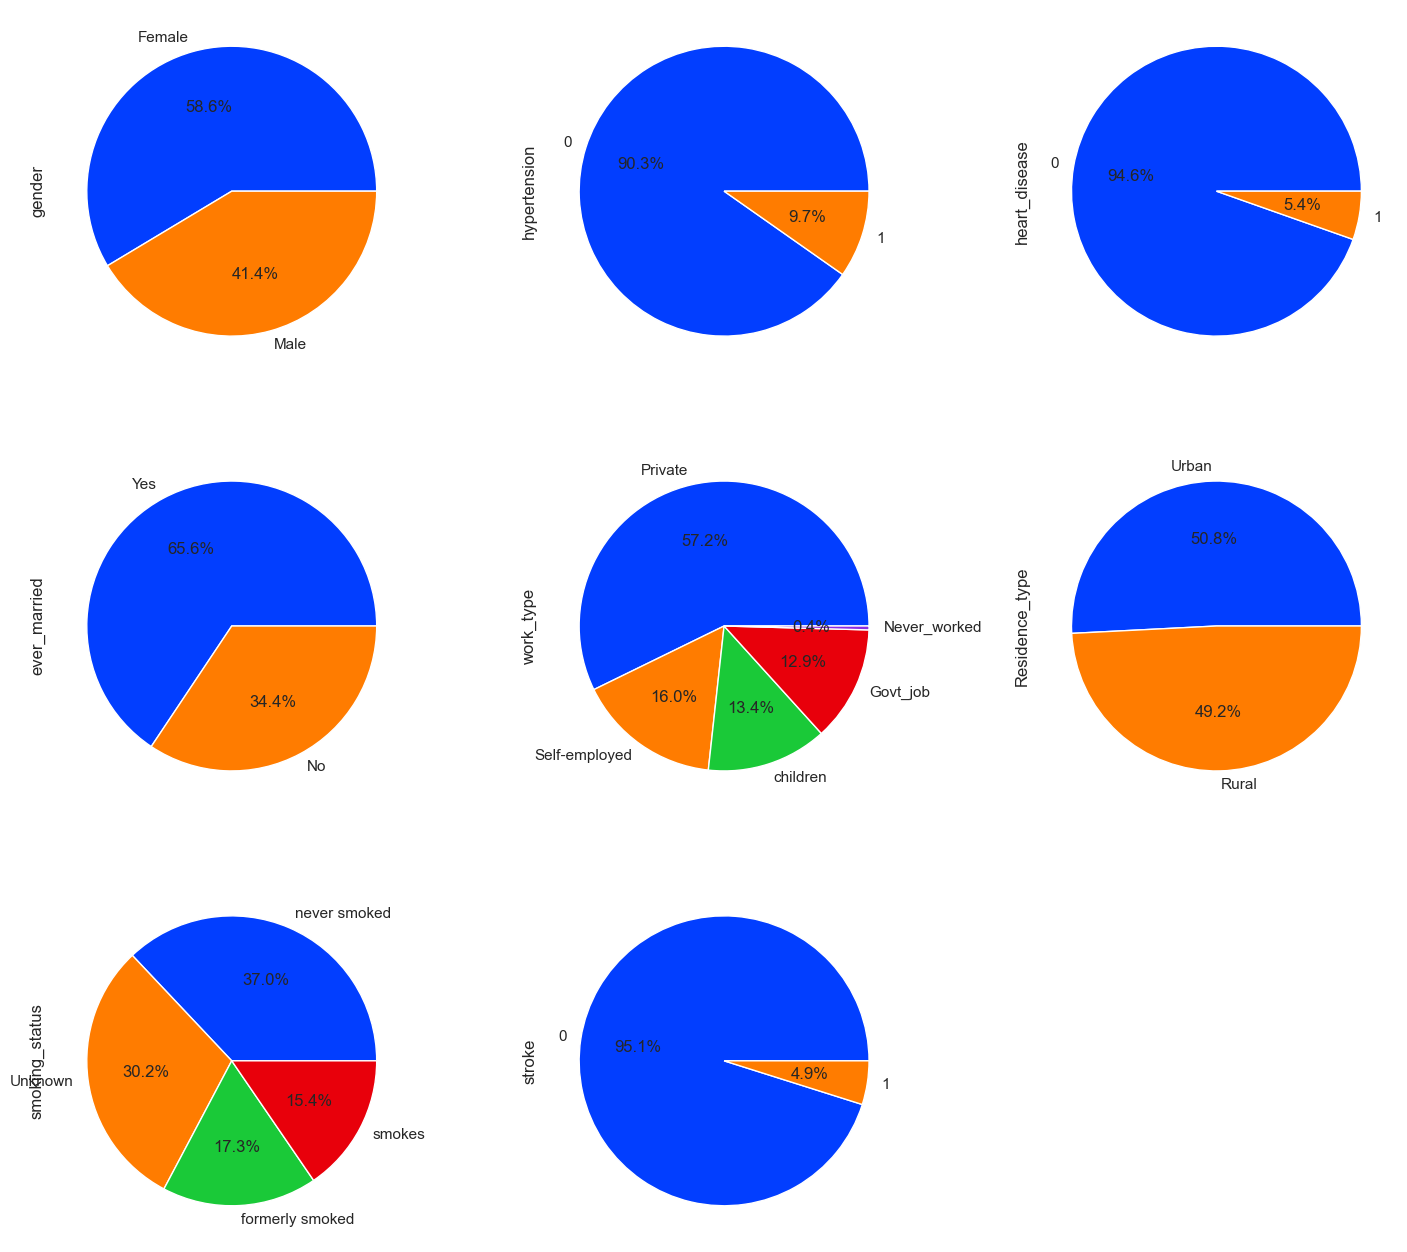

In [20]:
sns.set()
colors = sns.color_palette('bright')[0:7]
plt.figure(figsize=(18,16)) 
plt.subplot(3,3,1)
cat_stdf['gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors=colors)
plt.subplot(3,3,2)
cat_stdf['hypertension'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',colors=colors)
plt.subplot(3,3,3)
cat_stdf['heart_disease'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors=colors)
plt.subplot(3,3,4)
cat_stdf['ever_married'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',colors=colors)
plt.subplot(3,3,5)
cat_stdf['work_type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors=colors)
plt.subplot(3,3,6)
cat_stdf['Residence_type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',colors=colors)
plt.subplot(3,3,7)
cat_stdf['smoking_status'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors=colors)
plt.subplot(3,3,8)
cat_stdf['stroke'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',colors=colors)

plt.show()


In [29]:
# Work type of the people who had stroke
job = stdf.groupby(stdf['work_type'])['stroke'].sum()
data_job = pd.DataFrame({'labels': job.index,
                   'values': job.values
                  })
colors2= ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(14, 0, 255)', 'rgb(255,0,14)']
data_job.iplot(kind='pie',labels='labels',values='values', title='Work type of people who had stroke', colors = colors2,pull=[0.1, 0.1, 0.1, 0.2])

In [26]:
# Propotion of gender among people who had stroke
gender = stdf.groupby(stdf['gender'])['stroke'].sum()
data_gender = pd.DataFrame({'labels': gender.index,
                   'values': gender.values
                  })
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)']
data_gender.iplot(kind='pie',labels='labels',values='values', title='The Proportion of Stroke among Gender', colors = colors,
            pull=[0.02, 0.02])



In [30]:
# Smoking Status of people who had stroke
smoke = stdf.groupby(stdf['smoking_status'])['stroke'].sum()
data_smoke = pd.DataFrame({'labels': smoke.index,'values': smoke.values})
data_smoke.iplot(kind='pie',labels='labels',values='values', title='Smoking status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02, 0.1, 0.02])


In [31]:
# Residence type of people with stroke
Residence = stdf.groupby(stdf['Residence_type'])['stroke'].sum()
data_Residence = pd.DataFrame({'labels': Residence.index,
                   'values': Residence.values
                  })
data_Residence.iplot(kind='pie',labels='labels',values='values', title='Residence area of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)


In [32]:
# Marital status of people with stroke
Married = stdf.groupby(stdf['ever_married'])['stroke'].sum()
data_Married = pd.DataFrame({'labels': Married.index,
                   'values': Married.values
                  })
data_Married.iplot(kind='pie',labels='labels',values='values', title='Marriage status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [33]:
# Age distribution of people who had stroke
stroke = stdf.loc[stdf['stroke']== 1].reset_index()
stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages", xTitle='Ages', yTitle='Count')

In [34]:
# Converting the categorical variables into numerical ones and Checking for Correlation again

df = stdf
for  col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60,1,0


In [35]:
# CHecking for Data Correlation
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054722,-0.025609,-0.062423,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.238323,0.325851,0.265165,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.174540,0.160140,0.111018,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.161907,0.038854,0.048445,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.155329,0.335560,0.259604,0.108299
work_type,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.050492,-0.299495,-0.305942,-0.032323
Residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.004783,-0.000288,0.008168,0.015415
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,-0.050492,-0.004783,1.000000,0.168902,0.063498,0.131991
bmi,-0.025609,0.325851,0.160140,0.038854,0.335560,-0.299495,-0.000288,0.168902,1.000000,0.219108,0.038901
smoking_status,-0.062423,0.265165,0.111018,0.048445,0.259604,-0.305942,0.008168,0.063498,0.219108,1.000000,0.028108


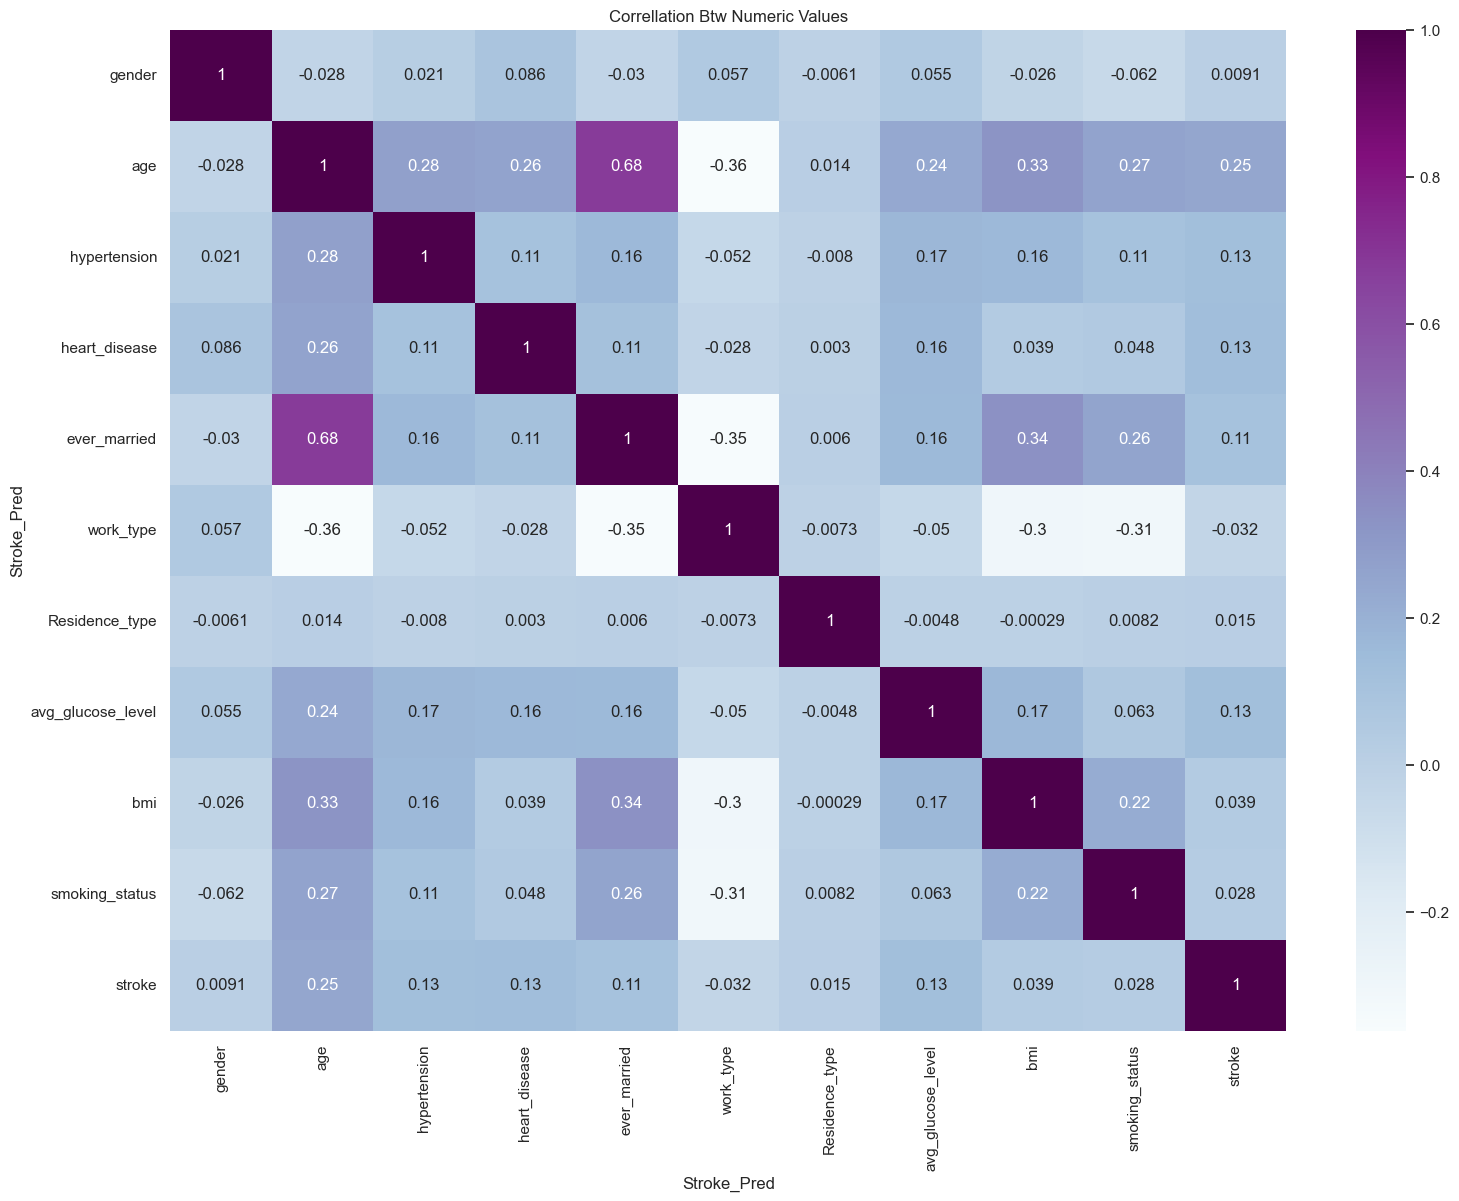

In [36]:
plt.figure(figsize = (18, 13))
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu' )
plt.title('Correllation Btw Numeric Values')
plt.xlabel('Stroke_Pred')
plt.ylabel('Stroke_Pred')
plt.show()

In [37]:
# Displaying Dataset attributes  with high correlation
corr_pairs = df.corr().unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)>0.4]
high_corr

age                ever_married         0.679084
ever_married       age                  0.679084
gender             gender               1.000000
work_type          work_type            1.000000
bmi                bmi                  1.000000
avg_glucose_level  avg_glucose_level    1.000000
Residence_type     Residence_type       1.000000
ever_married       ever_married         1.000000
heart_disease      heart_disease        1.000000
hypertension       hypertension         1.000000
age                age                  1.000000
smoking_status     smoking_status       1.000000
stroke             stroke               1.000000
dtype: float64

In [38]:
# # Checking for multicollinearity with Varaince Inflation Factor(VIF)
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_values'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    
    return(vif)

In [39]:
features = df.iloc[:, :-1]
calculate_vif(features)



,features,VIF_values
0,gender,1.703091
1,age,9.845914
2,hypertension,1.202266
3,heart_disease,1.163535
4,ever_married,5.706444
5,work_type,3.835958
6,Residence_type,1.973519
7,avg_glucose_level,6.695832
8,bmi,11.239428
9,smoking_status,2.949949


In [40]:
# # Feature Selection
#Spliting the data into Target and Observations
x = df.drop(['stroke'], axis=1)
y = df['stroke']

In [41]:
x.shape, y.shape

((5109, 10), (5109,))

0    4860
1     249
Name: stroke, dtype: int64


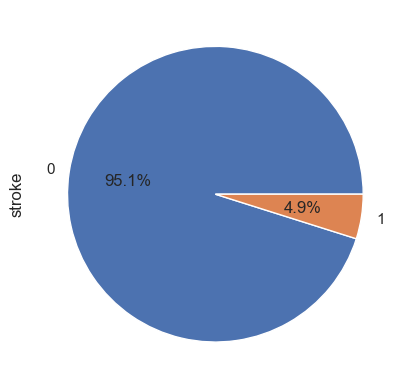

In [42]:
#Checking for oversampling of the target
y.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

print(y.value_counts())

In [43]:
# # Data Preprocessing

#Splitting the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)




In [44]:
#Scale the Data using standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
# Thhe data is inbalanced, taking care of the minority class by using the RandomOverSampling package in sklearn, 
#since one of the clases is oversampled
smote = SMOTE()
X_train, Y_train = smote.fit_resample(x_train, y_train)

0    3900
1    3900
Name: stroke, dtype: int64


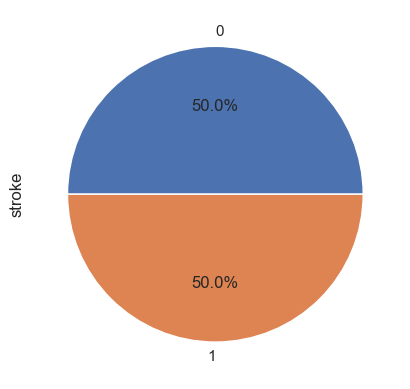

In [47]:
ax = Y_train.value_counts().plot.pie(autopct = '%0.1f%%')
print(Y_train.value_counts())



In [48]:
# # Data Modelling
#Logistic Regression 
model = LogisticRegression()
model.fit(X_train , Y_train)

LogisticRegression()

In [49]:
model.score(x_test, y_test)
model.score(X_train, Y_train)

0.793974358974359

In [50]:
lr_y_pred = model.predict(x_test)
confusion_matrix(y_test, lr_y_pred)

array([[717, 243],
       [ 15,  47]], dtype=int64)

In [51]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [52]:
#Using K-Nearest Nieghbour Classifier
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
knn_model.score(x_test, y_test)

C:\Users\orind\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.87279843444227

In [54]:
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.15      0.23      0.18        62

    accuracy                           0.87      1022
   macro avg       0.55      0.57      0.55      1022
weighted avg       0.90      0.87      0.89      1022



C:\Users\orind\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [55]:
confusion_matrix(y_test, y_pred_knn)

array([[878,  82],
       [ 48,  14]], dtype=int64)

In [56]:
#Using Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [57]:
svm_model.score(x_test, y_test)

0.7661448140900196

In [58]:
y_pred_svm = svm_model.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       960
           1       0.13      0.50      0.21        62

    accuracy                           0.77      1022
   macro avg       0.55      0.64      0.53      1022
weighted avg       0.91      0.77      0.82      1022



In [59]:
confusion_matrix(y_test, y_pred_svm)

array([[752, 208],
       [ 31,  31]], dtype=int64)

In [60]:

#Using random forest classifier
model_rf =  RandomForestClassifier()
model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [61]:
model_rf.score(x_test, y_test)

0.9080234833659491

In [62]:
y_pred_rf = model_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.12      0.08      0.10        62

    accuracy                           0.91      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.89      0.91      0.90      1022



In [63]:
confusion_matrix(y_test, y_pred_rf)

array([[923,  37],
       [ 57,   5]], dtype=int64)

In [64]:
#Comparing the accuracy results from the classifcation algorithms used
print('Accuracy score LR:  {:.2f}' .format(accuracy_score(y_test, lr_y_pred)))
print('Accuracy score KN:  {:.2f}' .format(accuracy_score(y_test, y_pred_knn)))
print('Accuracy score SVM: {:.2f}' .format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score RF:  {:.2f}' .format(accuracy_score(y_test, y_pred_rf)))

Accuracy score LR:  0.75
Accuracy score KN:  0.87
Accuracy score SVM: 0.77
Accuracy score RF:  0.91


In [65]:
# # Hyperparameter Tuning of the models to Check for improvement.
#Hyperparameter Tuning of the Linear Regrassion  model
model_lr = LogisticRegression()

In [66]:
param_grid = [
    {'penalty':['l1', 'l2', 'elasticnet', 'none'],
     'C': [0.01, 0.1, 1, 10],
     'max_iter': [100, 1000, 2500, 5000]        
    }
]




In [67]:
clf = GridSearchCV(model_lr, param_grid, cv=3, verbose = True, n_jobs =-1)

In [68]:
best_clf = clf.fit(X_train, Y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


C:\Users\orind\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\orind\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\orind\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\orind\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [69]:
print(f' Best_fit: {best_clf.best_estimator_}')


 Best_fit: LogisticRegression(C=0.1)


In [70]:
lr_rs = LogisticRegression(C=0.01, max_iter=2500, penalty='none',
                   solver='saga')
model_lr_rs = lr_rs.fit(X_train, Y_train)

y_pred_lr_rs = model_lr_rs.predict(x_test)

C:\Users\orind\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



In [71]:
print(classification_report(y_test, y_pred_lr_rs))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [72]:
#Hyperparament Tuning of K-Nearest Nieghbour Classifier
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}




In [73]:
k_model = KNeighborsClassifier()
kr = GridSearchCV(k_model, grid_params, cv=3, verbose = 1, n_jobs =-1)


In [74]:
k_model_kr = kr.fit(X_train, Y_train)
k_model_kr.best_score_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


0.9214102564102564

In [75]:
# get the hyperparameters with the best score
k_model_kr.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [76]:
# use the best hyperparameters
knn_rs = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'brute', metric = 'manhattan')

In [77]:
kt = knn_rs.fit(X_train, Y_train)

In [78]:
k_model_pred = kt.predict(x_test)

In [79]:
print(classification_report(y_test, k_model_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       960
           1       0.14      0.34      0.20        62

    accuracy                           0.84      1022
   macro avg       0.55      0.60      0.56      1022
weighted avg       0.90      0.84      0.87      1022



In [80]:
#Hyperparameter Tuning of the SVM model
sv_params = {'C': [0.1, 1, 10], 
            'kernel': [0.1, 1,10],
            'kernel': [ 'poly', 'rbf']}

In [81]:
sv_gr = GridSearchCV(SVC(), sv_params, cv=5, verbose = 0, n_jobs =-1)
model_sv = sv_gr.fit(X_train, Y_train)

In [82]:
model_sv.score(x_test, y_test)

0.7954990215264188

In [83]:
model_sv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [84]:
sv_rs = SVC(C=10, kernel= 'rbf')

In [85]:
model_sv_rs =sv_rs.fit(X_train, Y_train)

In [86]:
y_svrs_pred = model_sv_rs.predict(x_test)
print(classification_report(y_test, y_svrs_pred ))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       960
           1       0.13      0.40      0.19        62

    accuracy                           0.80      1022
   macro avg       0.54      0.61      0.54      1022
weighted avg       0.90      0.80      0.84      1022



In [87]:
# Hyperparameter tuning of RF model
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [88]:
params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [89]:
rfc = RandomForestClassifier()

In [90]:
random_search = RandomizedSearchCV(estimator = rfc,  param_distributions = params_grid, verbose = 2, 
                                   cv = 10, n_jobs = 4, random_state = 42)

In [91]:
random_search.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [92]:
print(f'best: {random_search.best_params_}')

best: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


In [93]:
rf_rs = RandomForestClassifier(n_estimators = 1400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2',
                               max_depth = 80, bootstrap = False,)
model_rf_rs = rf_rs.fit(X_train, Y_train)

y_pred_rf_rs = model_rf_rs.predict(x_test)

In [94]:
print(classification_report(y_test, y_pred_rf_rs))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.17      0.08      0.11        62

    accuracy                           0.92      1022
   macro avg       0.55      0.53      0.53      1022
weighted avg       0.90      0.92      0.91      1022



In [95]:
# # Evaluating the results to determine the best performing result after Hyperparameter tuning of all models
# Comparing the results from the RF and The Hyperparameter tuning. Their is an improvement on the accuracy of the result
print('Accuracy Score LR:                       {:.2f}' .format(accuracy_score(y_test, lr_y_pred)))
print('Accuracy Score LR + GridSearchCV:        {:.2f}' .format(accuracy_score(y_test, y_pred_lr_rs)))
print('Accuracy Score KNN:                      {:.2f}' .format(accuracy_score(y_test, y_pred_knn)))
print('Accuracy Score KNN + GridSearchCV:       {:.2f}' .format(accuracy_score(y_test, k_model_pred)))
print('Accuracy Score SVM:                      {:.2f}' .format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy Score SVM + RandomizedSearchCV: {:.2f}' .format(accuracy_score(y_test, y_svrs_pred)))
print('Accuracy Score RF:                       {:.2f}' .format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy Score RF + RandomizedSearchCV:  {:.2f}' .format(accuracy_score(y_test, y_pred_rf_rs)))

Accuracy Score LR:                       0.75
Accuracy Score LR + GridSearchCV:        0.75
Accuracy Score KNN:                      0.87
Accuracy Score KNN + GridSearchCV:       0.84
Accuracy Score SVM:                      0.77
Accuracy Score SVM + RandomizedSearchCV: 0.80
Accuracy Score RF:                       0.91
Accuracy Score RF + RandomizedSearchCV:  0.92


In [96]:
#Evuating the best Model Random Forest Clasifier
confusion_matrix(y_test, y_pred_rf_rs)


array([[935,  25],
       [ 57,   5]], dtype=int64)

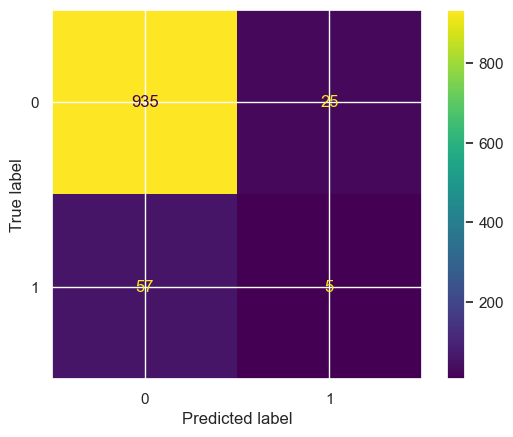

In [97]:
#Visualizing the confusion Matrix
predictions = model_rf_rs.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf_rs, labels = model_rf_rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf_rs.classes_)
disp.plot()
plt.show()

C:\Users\orind\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



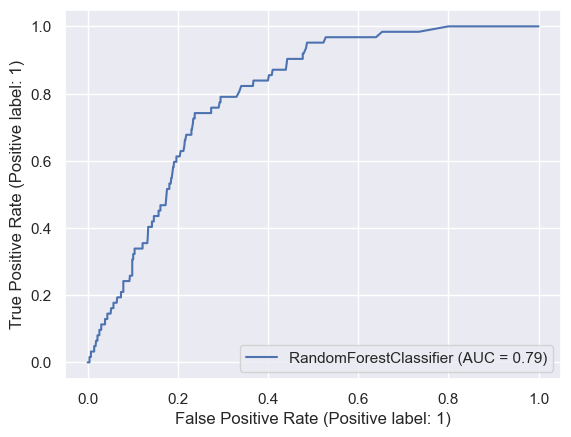

In [98]:
#Ploting the ROC curve
plot_roc_curve(model_rf_rs, x_test, y_test)